# Analysys of the Moreva et al. experiment



## Preliminaries

In [33]:
# Symbolic computation
from sympy import *
from sympy.physics.matrices import mdft
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.constants import hbar

In [34]:
# Remeber this to have LaTeX rendered output in Jupyter
init_printing()

## Computation

In [35]:
Omega = Symbol(r'\Omega')
omega = Symbol(r'\omega', real=True)

In [36]:
F = mdft(2)

In [37]:
Omega = I*omega*Matrix([
    [0, 1],
    [-1,0]
])

In [38]:
Omega.eigenvects()

⎡⎛            ⎡⎡-ⅈ⎤⎤⎞  ⎛           ⎡⎡ⅈ⎤⎤⎞⎤
⎢⎜-\omega, 1, ⎢⎢  ⎥⎥⎟, ⎜\omega, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝            ⎣⎣1 ⎦⎦⎠  ⎝           ⎣⎣1⎦⎦⎠⎦

In [39]:
T = (pi / (2*omega)**2) * F.adjoint()*Omega*F

In [40]:
T

⎡           -ⅈ⋅π   ⎤
⎢   0      ────────⎥
⎢          4⋅\omega⎥
⎢                  ⎥
⎢  ⅈ⋅π             ⎥
⎢────────     0    ⎥
⎣4⋅\omega          ⎦

In [41]:
T.eigenvects()

⎡⎛  -π         ⎡⎡ⅈ⎤⎤⎞  ⎛   π         ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜────────, 1, ⎢⎢ ⎥⎥⎟, ⎜────────, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝4⋅\omega     ⎣⎣1⎦⎦⎠  ⎝4⋅\omega     ⎣⎣1 ⎦⎦⎠⎦

In [42]:
T_d = diag(-pi/(4*omega), pi/(4*omega))

In [43]:
T_d

⎡  -π              ⎤
⎢────────     0    ⎥
⎢4⋅\omega          ⎥
⎢                  ⎥
⎢             π    ⎥
⎢   0      ────────⎥
⎣          4⋅\omega⎦

Check: this is what we would obtain with matric of cols egeinv

In [44]:
R = (1/sqrt(2)) * Matrix([
    [I, -I],
    [1, 1]
])

In [45]:
R.adjoint()*T*R

⎡  -π              ⎤
⎢────────     0    ⎥
⎢4⋅\omega          ⎥
⎢                  ⎥
⎢             π    ⎥
⎢   0      ────────⎥
⎣          4⋅\omega⎦

In [46]:
Omega_T_d = (pi/((pi/(2*omega))**2))*F*T_d*F.adjoint()

In [47]:
Omega_T_d

⎡   0     -\omega⎤
⎢                ⎥
⎣-\omega     0   ⎦

In [48]:
Hs = I*hbar*omega*Matrix([
    [0, 1],
    [-1,0]
])

In [49]:
simplify(exp(I*pi/4))

In [50]:
J = TensorProduct(hbar*Omega_T_d, eye(2)) + TensorProduct(eye(2), Hs)

In [51]:
J

⎡     0       ℏ⋅ⅈ⋅\omega   -ℏ⋅\omega       0     ⎤
⎢                                                ⎥
⎢-ℏ⋅ⅈ⋅\omega      0            0       -ℏ⋅\omega ⎥
⎢                                                ⎥
⎢ -ℏ⋅\omega       0            0       ℏ⋅ⅈ⋅\omega⎥
⎢                                                ⎥
⎣     0       -ℏ⋅\omega   -ℏ⋅ⅈ⋅\omega      0     ⎦

In [52]:
J.eigenvects()

⎡⎛      ⎡⎡0 ⎤  ⎡ⅈ⎤⎤⎞  ⎛                ⎡⎡-ⅈ⎤⎤⎞  ⎛               ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥  ⎢ ⎥⎥⎟  ⎜                ⎢⎢  ⎥⎥⎟  ⎜               ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢-ⅈ⎥  ⎢0⎥⎥⎟  ⎜                ⎢⎢1 ⎥⎥⎟  ⎜               ⎢⎢-1⎥⎥⎟⎥
⎢⎜0, 2, ⎢⎢  ⎥, ⎢ ⎥⎥⎟, ⎜-2⋅ℏ⋅\omega, 1, ⎢⎢  ⎥⎥⎟, ⎜2⋅ℏ⋅\omega, 1, ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢1 ⎥  ⎢0⎥⎥⎟  ⎜                ⎢⎢-ⅈ⎥⎥⎟  ⎜               ⎢⎢ⅈ ⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥  ⎢ ⎥⎥⎟  ⎜                ⎢⎢  ⎥⎥⎟  ⎜               ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣0 ⎦  ⎣1⎦⎦⎠  ⎝                ⎣⎣1 ⎦⎦⎠  ⎝               ⎣⎣1 ⎦⎦⎠⎦

## Comparison with ordinary QM 

In [53]:
def evolve_psi(t, t0, psi0):
    return exp(-I*Hs*(t-t0)/hbar)*psi0

In [54]:
def correction_eigenJ(t, t0, eigenvalue):
    return exp(I*eigenvalue*(t-t0)/hbar)

In [55]:
def correction_timeshift(t, t0, timeshift):
    deltaT = pi/(2*omega)
    omega_prime = (pi*timeshift) / (deltaT**2)
    return exp(-I*omega_prime*(t-t0))

In [75]:
def psi_fixed(t, t0, psi0, eigenvalue):
    return evolve_psi(t, t0, psi0) * correction_eigenJ(t, t0, eigenvalue) * correction_timeshift(t, t0, t0)

In [76]:
t = Symbol('t')

In [82]:
psi_fixed(t, -pi/(4*omega), Matrix([0, -I]), 0).subs({'omega': 1})
    

⎡   ⎛                               ⅈ⋅(4⋅\omega⋅t + π)                        
⎢   ⎜                            2  ──────────────────                        
⎢   ⎜            2 ⎛       π    ⎞           4                     ⎛       π   
⎢   ⎜  8⋅ⅈ⋅\omega ⋅⎜t + ────────⎟ ⋅ℯ                     2⋅\omega⋅⎜t + ───────
⎢   ⎜              ⎝    4⋅\omega⎠                                 ⎝    4⋅\omeg
⎢-ⅈ⋅⎜- ─────────────────────────────────────────────── - ─────────────────────
⎢   ⎜                                 2                                       
⎢   ⎝                 (4⋅\omega⋅t + π)                                        
⎢                                                                             
⎢                 ⎛                         ⅈ⋅(4⋅\omega⋅t + π)     ⎛          
⎢                 ⎜                         ──────────────────     ⎜4⋅ⅈ⋅\omega
⎢                 ⎜         ⎛       π    ⎞          4              ⎜          
⎢                 ⎜2⋅\omega⋅⎜t + ────────⎟⋅ℯ        

In [58]:
 psi_fixed_np_h_re = lambdify(t, re(psi_fixed(t, -pi/(4*omega)).subs({omega: 1})[0]), 'numpy') 

In [59]:
 psi_fixed_np_h_im = lambdify(t, im(psi_fixed(t, -pi/(4*omega)).subs({omega: 1})[0]), 'numpy') 

In [60]:
psi_fixed_np_h_re(0)

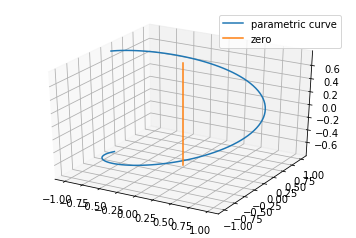

In [68]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
z = np.linspace(-np.pi/4, np.pi/4, 100)
x = np.cos(4*z)
y = np.sin(4*z)
zero = z - z

ax.plot(x, y, z, label='parametric curve')
ax.plot(zero, zero, z, label='zero')

ax.legend()

plt.show()
